In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [ ]:
#uderstanding the spread of data using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df["features"] = df.columns
vif_df["VIF Factor"] = [vif(df.values, i) for i in range(df.shape[1])]
print(vif_df)

    features  VIF Factor
0        age   38.882441
1        sex    3.792920
2         cp    2.566095
3   trestbps   57.978546
4       chol   26.208367
5        fbs    1.272173
6    restecg    2.073125
7    thalach   47.110371
8      exang    2.111290
9    oldpeak    3.182085
10     slope    9.990892
11        ca    1.960731
12      thal   17.183907
13    target    4.108633


<Axes: >

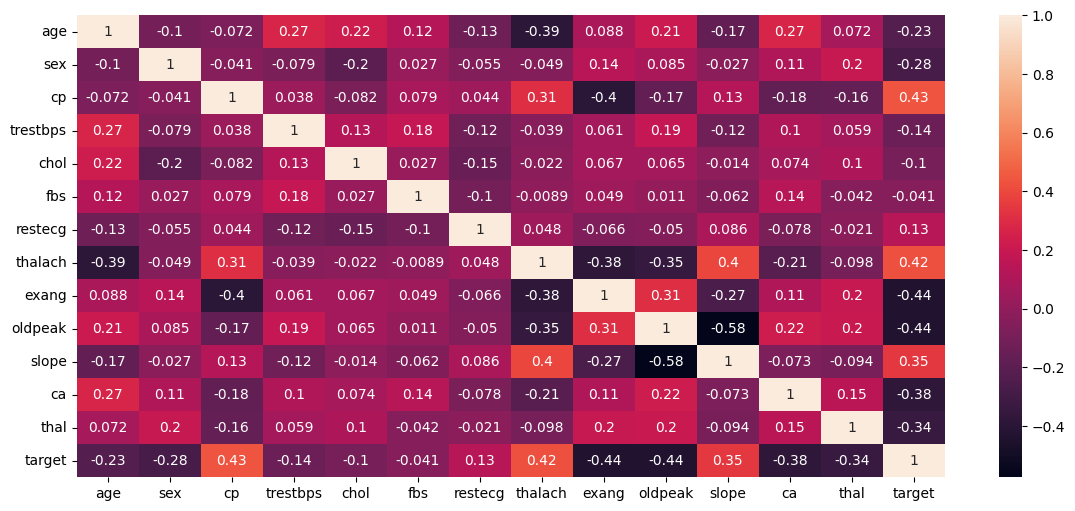

In [ ]:
#ploting the correlation between the variables
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(), annot = True)

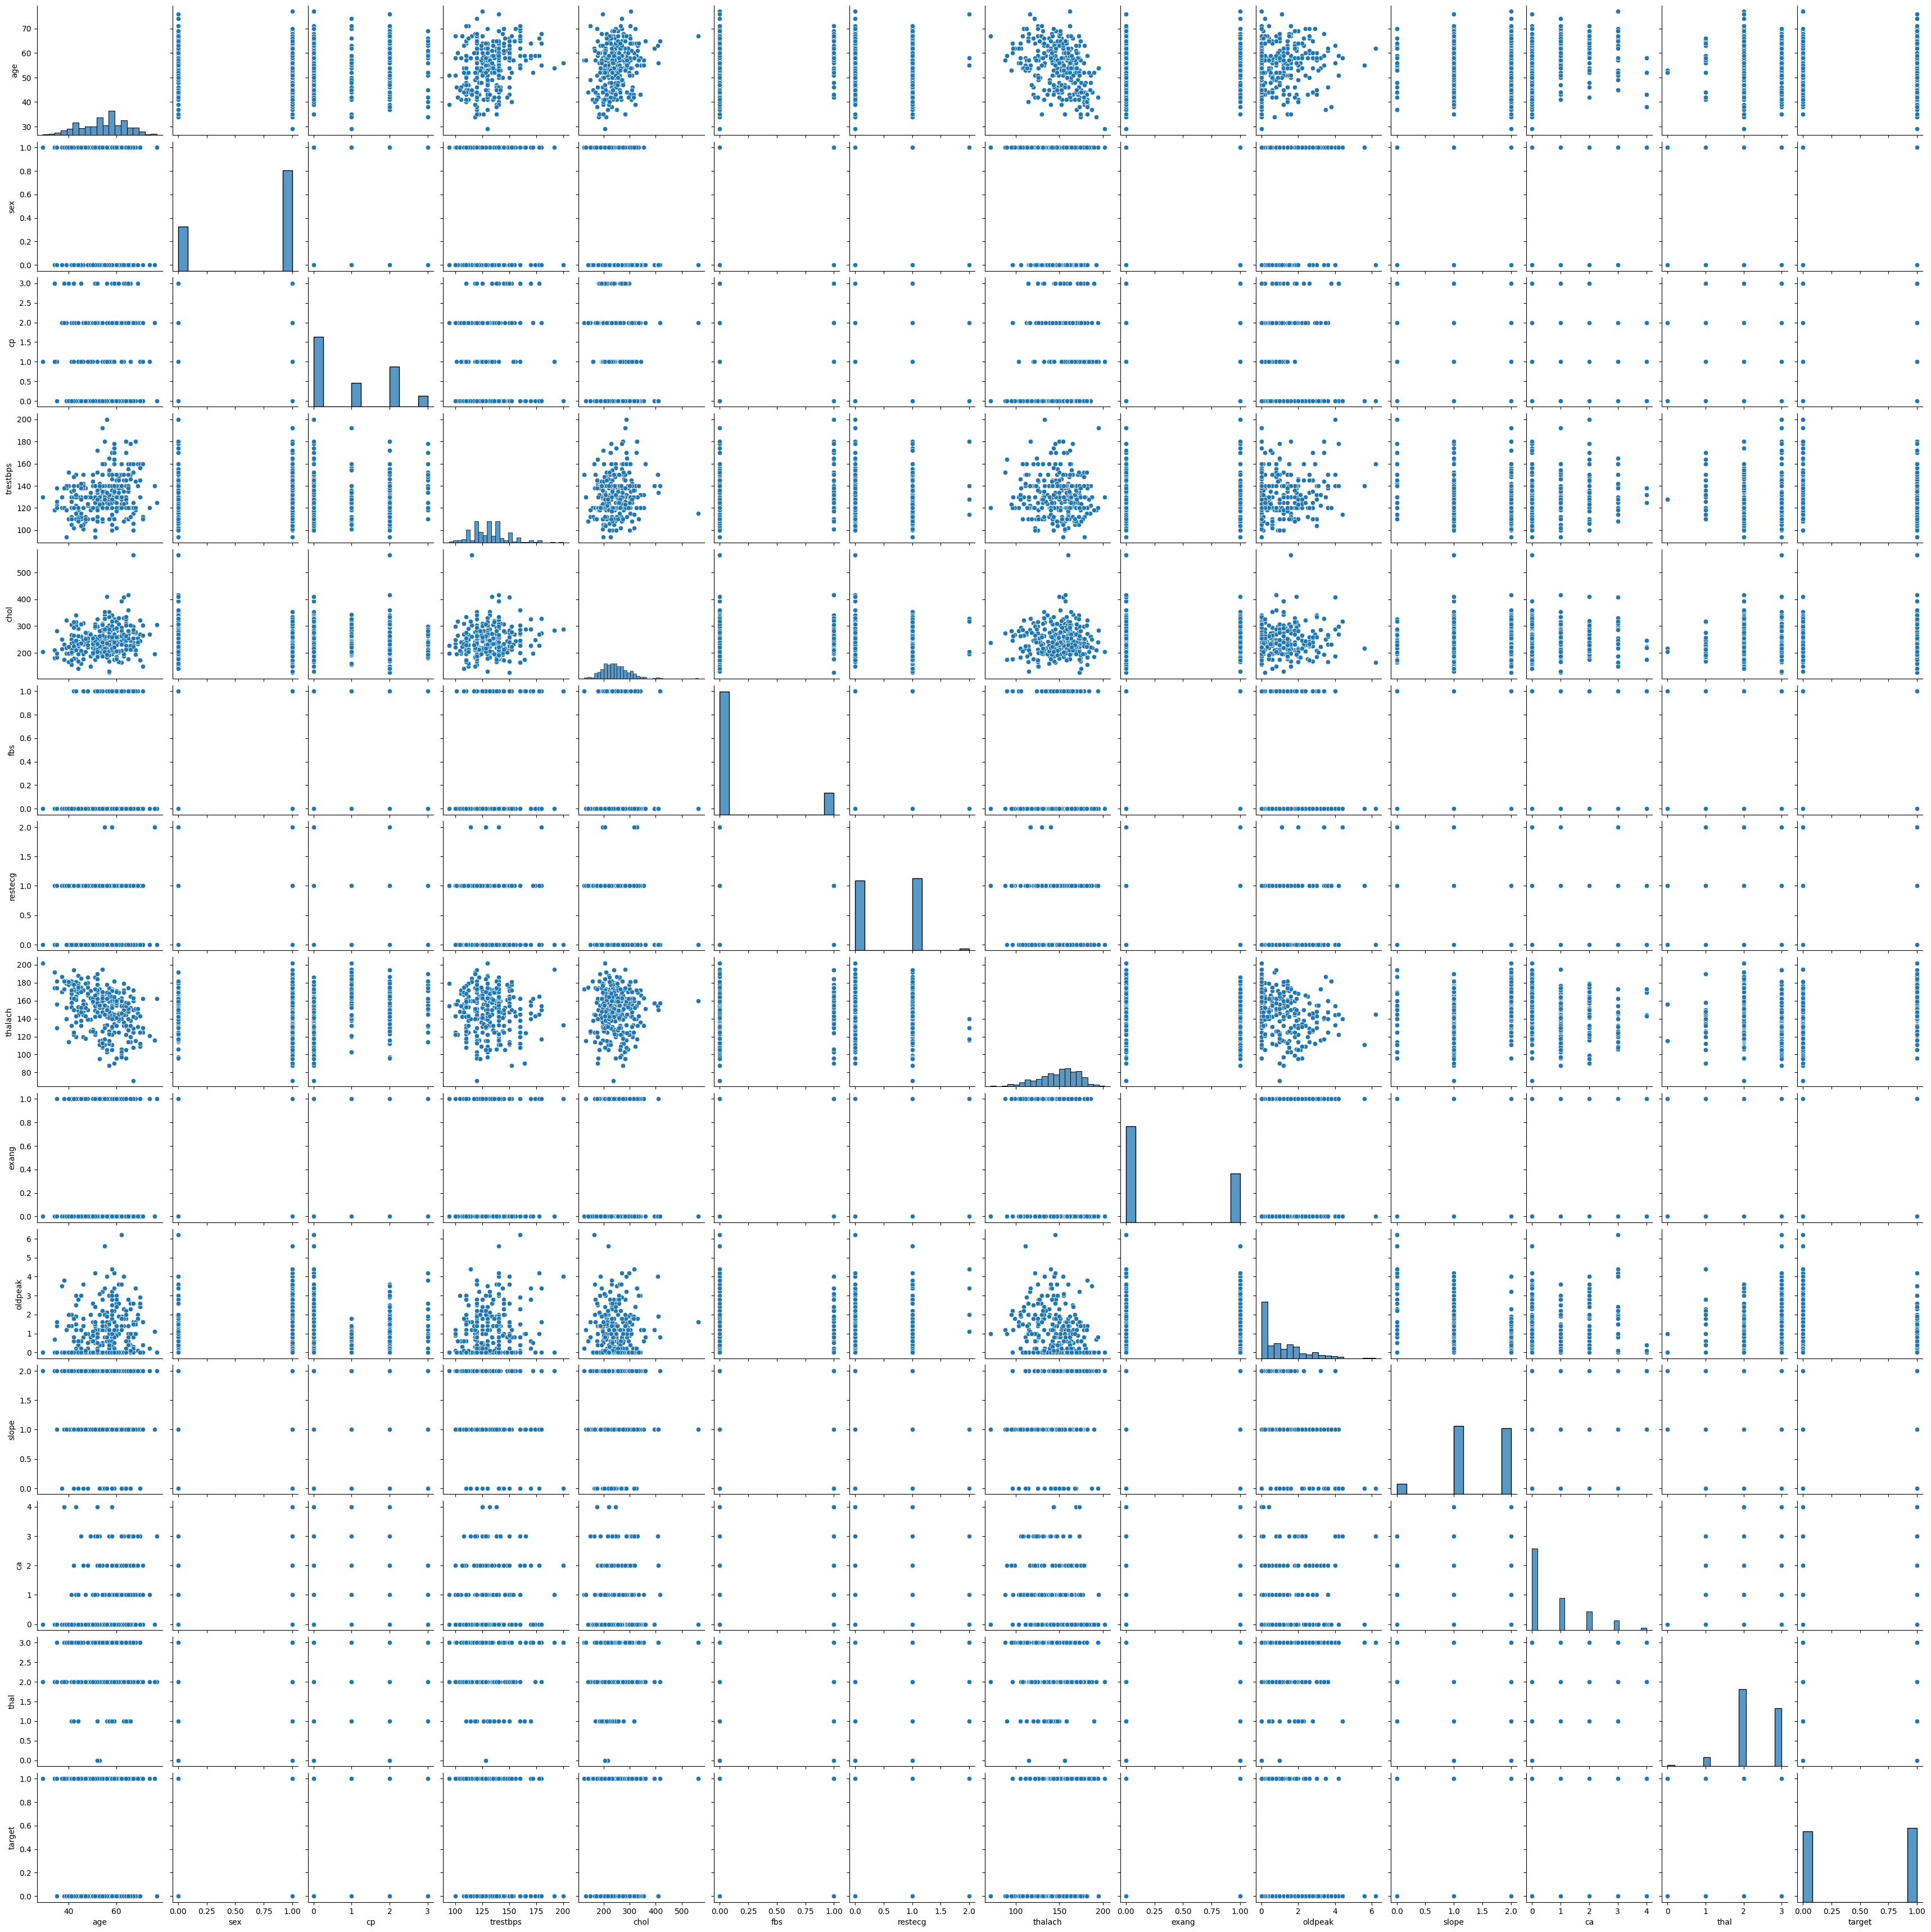

In [ ]:
sns.pairplot(df)

In [ ]:
#Exploring the distribution of age based on the likelihood to heart disease
heart_disease = df[df['target']==0]
heart_disease_no = df[df['target']==1]

<ipython-input-13-be36f7e4e36c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_disease['age'], color="blue", label="Data 0")
<ipython-input-13-be36f7e4e36c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_disease_no['age'], color="red", label="Data 1")


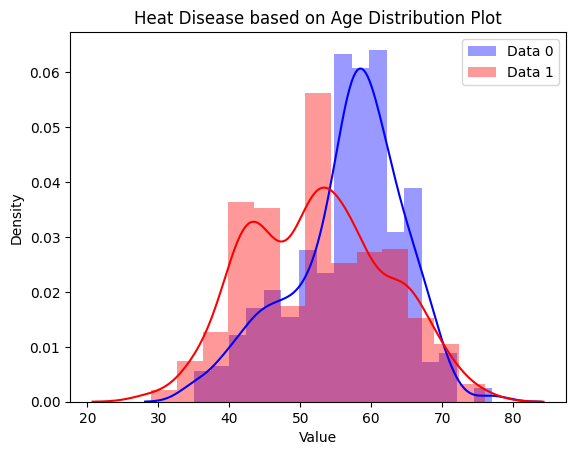

In [ ]:
sns.distplot(heart_disease['age'], color="blue", label="Data 0")
sns.distplot(heart_disease_no['age'], color="red", label="Data 1")
# Add legend and labels
plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Heat Disease based on Age Distribution Plot")
plt.show()

<ipython-input-17-19a86c9fc85a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_disease['cp'], color="blue", label="Data 0")
<ipython-input-17-19a86c9fc85a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_disease_no['cp'], color="red", label="Data 1")


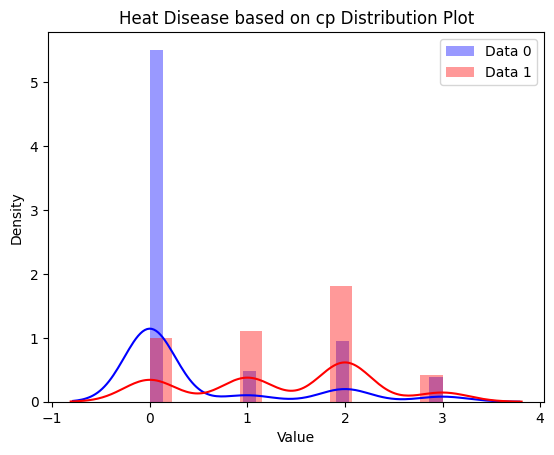

In [ ]:
sns.distplot(heart_disease['cp'], color="blue", label="Data 0")
sns.distplot(heart_disease_no['cp'], color="red", label="Data 1")
# Add legend and labels
plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Heat Disease based on cp Distribution Plot")
plt.show()

<Axes: xlabel='target', ylabel='count'>

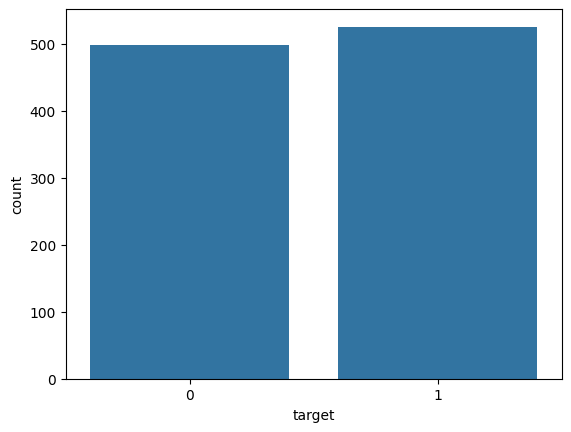

In [ ]:
sns.countplot(x="target", data=df)

sex
1    713
0    312
Name: count, dtype: int64


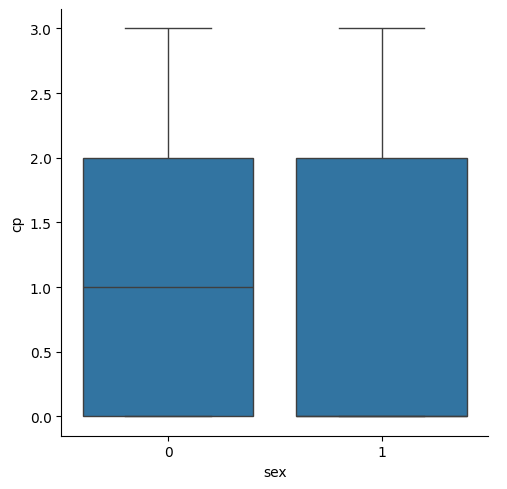

In [ ]:
sns.catplot(x="sex", data=df, kind="box",y="cp")
print(df['sex'].value_counts())

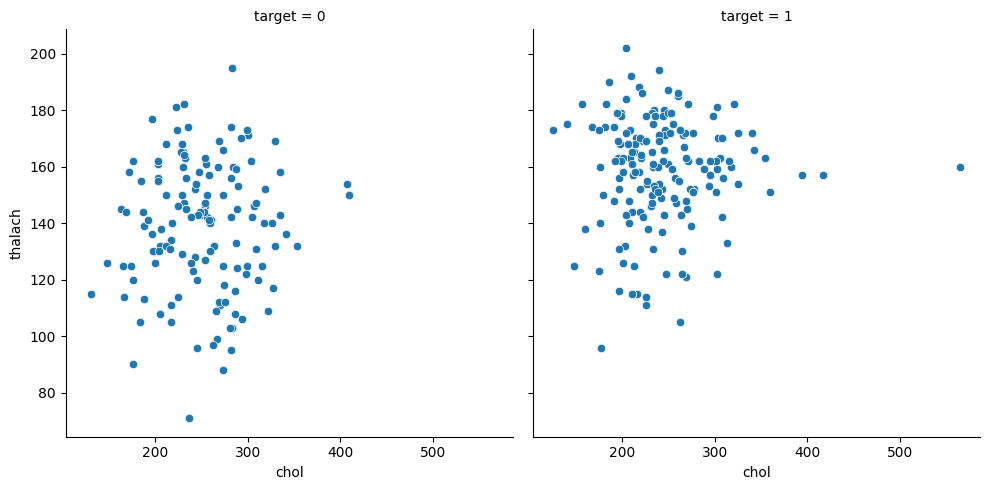

In [ ]:
sns.relplot(x="chol",y="thalach",data=df,col="target",col_wrap=2)

Text(5.069444444444452, 0.5, 'height')

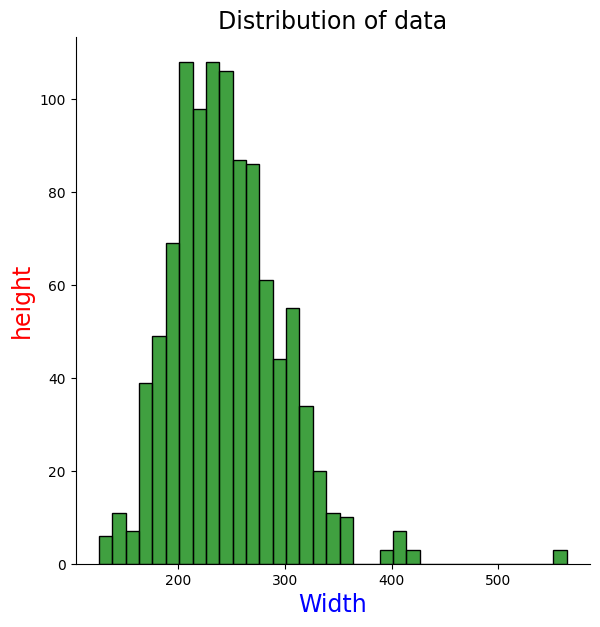

In [ ]:
sns.displot(df["chol"],color="g",height=6)
plt.title("Distribution of data",fontsize=17,c="k")
plt.xlabel("Width",fontsize=17,c="b")
plt.ylabel("height",fontsize=17,c="r")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


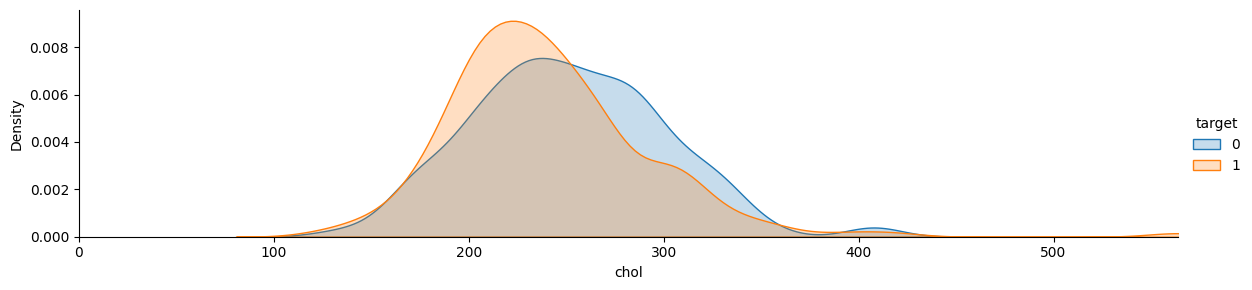

In [ ]:
facet=sns.FacetGrid(df,hue="target",aspect=4)
facet.map(sns.kdeplot,"chol",shade=True)
facet.set(xlim=(0,df["chol"].max()))
facet.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


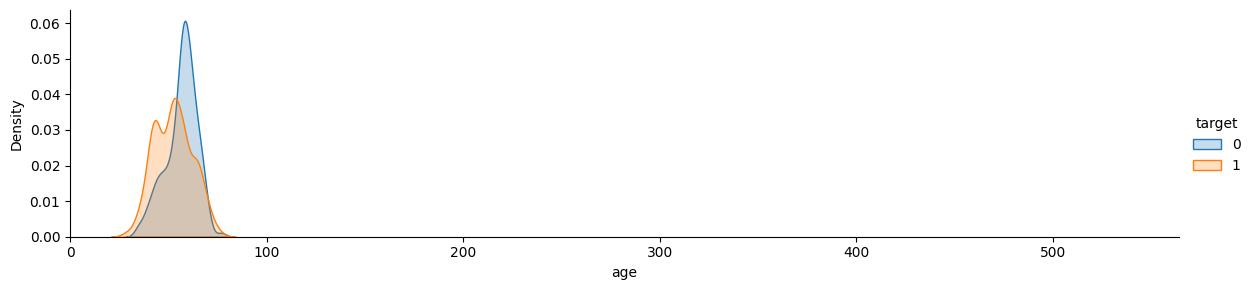

In [ ]:
facet=sns.FacetGrid(df,hue="target",aspect=4)
facet.map(sns.kdeplot,"age",shade=True)
facet.set(xlim=(0,df["chol"].max()))
facet.add_legend()
plt.show()

<Axes: >

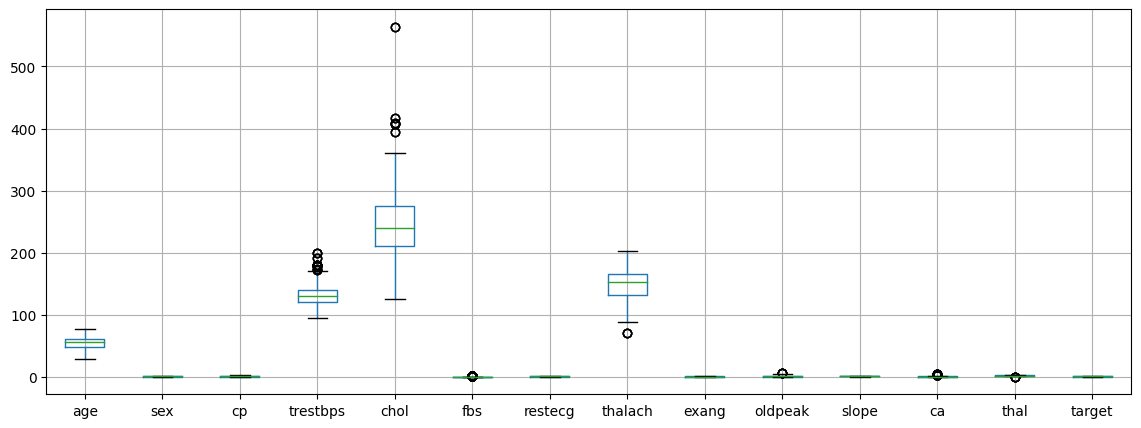

In [ ]:
plt.figure(figsize=(14, 5))
df.boxplot()

In [ ]:
# Calculate the quantiles
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
# Calculate the interquartile range
iqr =q3 - q1
# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# Select rows that are within the lower and upper bounds
df_filtered = df[(df >= lower_bound) & (df <= upper_bound)]
# Print the filtered DataFrame
df_filtered.head()
print(df_filtered.shape)

(1025, 14)


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (820, 13)
x_test shape (205, 13)
y_train shape (820,)
y_test shape (205,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=3,random_state=0,max_depth=6,max_features=4)
clf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features=4, n_estimators=3,
                       random_state=0)

In [ ]:
clf1.score(x_train,y_train)

0.974390243902439

In [ ]:
clf1.score(x_test,y_test)

0.9170731707317074

In [ ]:
y_predict = clf1.predict(x_test)
y_predict

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Create confusion matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)


[[92 10]
 [ 7 96]]


<Axes: >

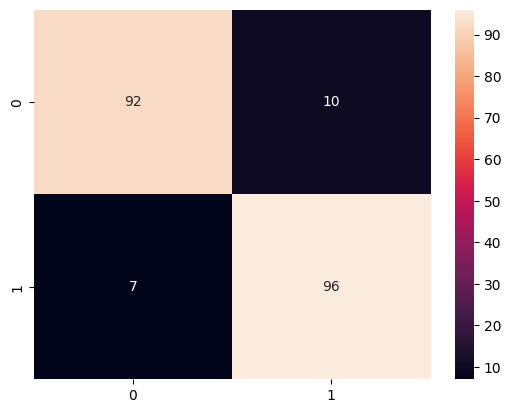

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
# Print classification report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.93      0.90      0.92       102
           1       0.91      0.93      0.92       103

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(x_train,y_train)

1.0

In [ ]:
dt.score(x_test,y_test)

0.9853658536585366

In [ ]:
y_predict = dt.predict(x_test)
y_predict

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [ ]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[102   0]
 [  3 100]]


<Axes: >

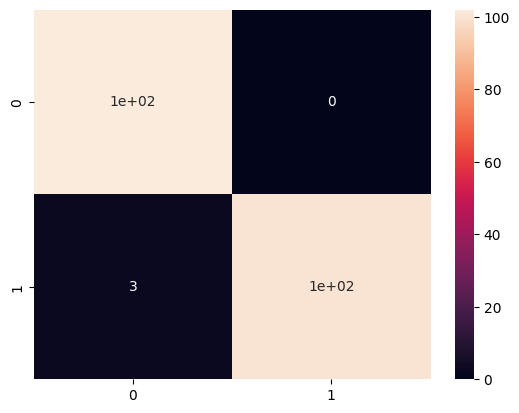

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
# Print classification report using decision tree
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
import pickle
# Save the model to a file called 'decision.pickle'
with open('decision.pickle', 'wb') as f:
    pickle.dump(dt, f)

In [ ]:
import pickle
import numpy as np
# Load the model from the file
with open('decision.pickle', 'rb') as f:
    model = pickle.load(f)
# Define a function to make predictions using the model
def predict(data):
    # Convert the data to a NumPy array
    data = np.array(data)
    # Reshape the data to a single instance
    data = data.reshape(1, -1)
    # Make a prediction using the model
    prediction = model.predict(data)[0]
    # Return the prediction
    return prediction
# Define the pipeline application
def pipeline():
    # Get the data from the user
    data = []
    for i in range(13):
        value = float(input(f"Enter the value for feature {i+1}: "))
        data.append(value)
    # Make a prediction using the model
    prediction = predict(data)

    # Print the prediction
    if prediction == 0:
        print("The person is not likely to have heart disease.")
    else:
        print("The person is likely to have heart disease.")

# Run the pipeline application
pipeline()

Enter the value for feature 1: 12
Enter the value for feature 2: 23
Enter the value for feature 3: 1
Enter the value for feature 4: 0
Enter the value for feature 5: 0
Enter the value for feature 6: 12
Enter the value for feature 7: 45
Enter the value for feature 8: 1
Enter the value for feature 9: 2
Enter the value for feature 10: 3
Enter the value for feature 11: 0
Enter the value for feature 12: 0
Enter the value for feature 13: 0
The person is likely to have heart disease.
